In [ ]:
stopwords = list(set([
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '부터', '며', '등', '하다', '한다', '하고', '하니',
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다',
    '고', '면', '게', '지', '죠',
    '또한', '또는', '및', '즉', '한편', '반면에',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', '그렇다',
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '내용', '결과', '자체', '가지', '있다',
    '했다', '같다', '네요','아니다',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예',
    '가다', '오다', '주다', '말다', '나다', '받다', '알다', '싶다', '생각하다'
]))


In [54]:
from functools import partial
from konlpy.tag import Okt
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 불러오기 (중립 제거 포함)
train_df = pd.read_csv("../data/정제_train_data.csv", encoding="utf-8-sig")
test_df = pd.read_csv("../data/정제_test_data.csv", encoding="utf-8-sig")

train_df = train_df[train_df["label"].isin([0, 1])]
test_df = test_df[test_df["label"].isin([0, 1])]

X_train_text = train_df["text"]
y_train = train_df["label"]
X_test_text = test_df["text"]
y_test = test_df["label"]

# 2. 형태소 분석기 + tokenizer 함수 정의
okt = Okt()

def tokenize(text, stopwords=[]):
    try:
        return [
            word.lower()
            for word, pos in okt.pos(text, stem=True)
            if pos in ['Noun', 'Adjective']
            and word.lower() not in stopwords
            and len(word) > 1
        ]
    except Exception as e:
        print(f"Tokenization error: {e}")
        return []

tokenizer_with_stopwords = partial(tokenize, stopwords=stopwords)


# 3. TF-IDF 벡터화 with tokenizer
vectorizer = TfidfVectorizer(max_features=2000,tokenizer=tokenizer_with_stopwords)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 4. 모델 학습
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 5. 평가
y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))


c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from functools import partial
from konlpy.tag import Okt
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 불러오기 (중립 제거 포함)
train_df = pd.read_csv("../data/분리_train_data.csv", encoding="utf-8-sig")
test_df = pd.read_csv("../data/분리_test_data.csv", encoding="utf-8-sig")

train_df = train_df[train_df["label"].isin([0, 1])]
test_df = test_df[test_df["label"].isin([0, 1])]

X_train_text = train_df["text"]
y_train = train_df["label"]
X_test_text = test_df["text"]
y_test = test_df["label"]

# 2. 형태소 분석기 + tokenizer 함수 정의
okt = Okt()

def tokenize(text, stopwords=[]):
    try:
        return [
            word.lower()
            for word, pos in okt.pos(text, stem=True)
            if pos in ['Noun', 'Adjective']
            and word.lower() not in stopwords
            and len(word) > 1
        ]
    except Exception as e:
        print(f"Tokenization error: {e}")
        return []

tokenizer_with_stopwords = partial(tokenize, stopwords=stopwords)


# 3. TF-IDF 벡터화 with tokenizer
vectorizer = TfidfVectorizer(max_features=1500,tokenizer=tokenizer_with_stopwords)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 4. 모델 학습
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)

# 5. 평가
y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))


c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


=== Confusion Matrix ===
[[2393  184]
 [ 196 2380]]

=== Classification Report ===
              precision    recall  f1-score   support

           0      0.924     0.929     0.926      2577
           1      0.928     0.924     0.926      2576

    accuracy                          0.926      5153
   macro avg      0.926     0.926     0.926      5153
weighted avg      0.926     0.926     0.926      5153



In [4]:
import joblib

# 모델과 벡터라이저 저장
joblib.dump(model, '2000_logistic_model.pkl')
joblib.dump(vectorizer, '2000_logistic_tfdf_vectorizer.pkl')

print("모델과 벡터라이저 저장 완료!")

모델과 벡터라이저 저장 완료!


In [ ]:
#!pip install -U ipywidgets
#jupyter nbextension enable --py widgetsnbextension
#!pip install --upgrade huggingface_hub
#!pip install --upgrade transformers huggingface_hub

In [ ]:
import transformers
import huggingface_hub

print(transformers.__version__)   # ex: 4.42.1
print(huggingface_hub.__version__)  # ex: 0.23.2

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# 1. 단어 리스트 및 가중치
feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_[0]  # 이진 분류이므로 shape (1, n_features)

# 2. 긍정/부정 top 단어 인덱스 추출
topn = 30
top_pos_idx = np.argsort(coef)[::-1][:topn]
top_neg_idx = np.argsort(coef)[:topn]

# 3. 긍정 / 부정 단어별 가중치 딕셔너리 생성
word_weights = {
    1: dict(zip(feature_names[top_pos_idx], coef[top_pos_idx])),
    0: dict(zip(feature_names[top_neg_idx], coef[top_neg_idx])),
}

In [1]:

from matplotlib import font_manager as fm
font_path = "C:\\Users\\MYCOM\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NotoSansKR-Bold.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

def draw_wordcloud(word_weight_dict, title, color='Greens'):
    wc = WordCloud(
        font_path=font_path,  # Mac은 AppleGothic, Linux는 나눔폰트
        background_color='white',
        colormap=color,
        width=800,
        height=400
    )
    wc.generate_from_frequencies(word_weight_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

NameError: name 'plt' is not defined

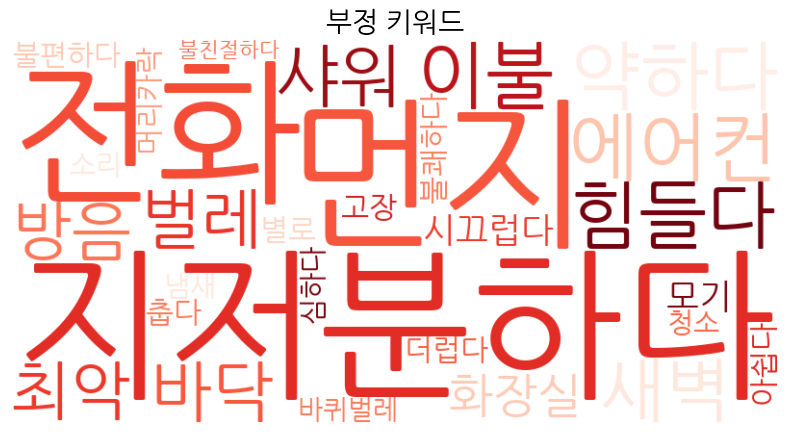

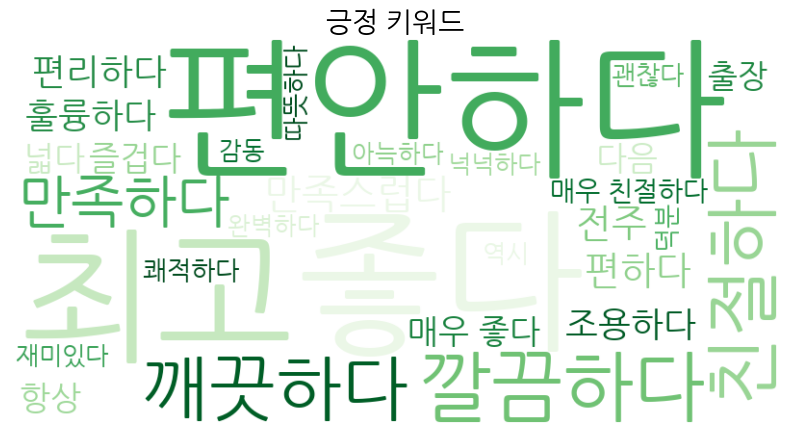

In [15]:
draw_wordcloud(word_weights[0], '부정 키워드', color='Reds')
draw_wordcloud(word_weights[1], '긍정 키워드', color='Greens')

In [56]:
import pandas as pd
import pickle

from joblib import load

model = load('logistic_model.pkl')
vectorizer = load('logistic_tfdf_vectorizer.pkl')

In [57]:
# 새 문장 리스트
import pandas as pd
df = pd.read_csv("../data/분리_test_data.csv")
# 문장 텍스트 벡터화
X = vectorizer.transform(df['sentence'])

# 예측
pred = model.predict(X)
prob = model.predict_proba(X)  # 확률값도 출력 가능 (2차원: [긍, 부정])

# 결과 저장
df['predicted_label'] = pred
df['pos'] = prob[:, 1]  # 클래스 1에 대한 확률
df['neg'] = prob[:, 0]  # 클래스 0에 대한 확률

In [58]:
df.to_csv("문장분리_리뷰_예측결과.csv", index=False, encoding='utf-8-sig')

In [9]:
from wordcloud import WordCloud

# 워드클라우드용 단어 + 가중치 딕셔너리 만들기
word_weights = {
    label: dict(zip(df['word'], df['weight']))
    for label, df in weights.items()
}
print(word_weights.keys())

# 워드클라우드 그리기 함수
def draw_wordcloud(word_weight_dict, title, color):
    wc = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        background_color='white',
        colormap=color,
        width=800,
        height=400
    )
    wc.generate_from_frequencies(word_weight_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# 클래스별 워드클라우드 출력
draw_wordcloud(word_weights[0], '부정 감성 주요 단어', 'Reds')
draw_wordcloud(word_weights[1], '긍정 감성 주요 단어', 'Greens')


NameError: name 'weights' is not defined

In [ ]:
# 새 문장 리스트
import pandas as pd
df = pd.read_csv("../data/분리_test_data.csv")

In [ ]:
import kss

# 분할 결과 저장 리스트
split_data = []

# 리뷰를 문장 단위로 나누고, 원래의 라벨을 그대로 복사
for idx, row in df.iterrows():
    sentences = kss.split_sentences(row['text'])
    for sentence in sentences:
        # 너무 짧은 문장은 제거
        if len(sentence.strip()) >= 4:
            split_data.append({
                'sentence': sentence.strip(),
                'label': row['label']
            })

# 결과를 새 데이터프레임으로 변환
split_df = pd.DataFrame(split_data)

# 저장 (선택)
split_df.to_csv("분리된_리뷰_데이터.csv", index=False, encoding='utf-8-sig')

In [46]:
split_df = pd.DataFrame(split_data)